In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import os
#cleaned
eng_path = "Team_player_data/cleaned/EPL.csv"
it_path = "Team_player_data/cleaned/SerieA.csv"
spain_path = "Team_player_data/cleaned/Liga.csv"

#read the cleaned data
eng_df = pd.read_csv(eng_path)
it_df = pd.read_csv(it_path)
spain_df = pd.read_csv(spain_path)
eng_df.head(10)

,Ranking,Year,Teams,Points,Goals+,Goals-,avg age,avg heights (cm),avg weight (kg),avg player rating,avg player value (EU),avg player wage
0,1,2019,Liverpool,99,85,33,24.00,180.48,73.18,76.00,18015303,88212
1,2,2019,Manchester City,81,102,35,24.09,180.45,74.12,76.85,22951363,112758
2,3,2019,Manchester United,66,66,36,24.76,183.21,75.36,77.45,19016666,106727
3,4,2019,Chelsea,66,69,54,25.21,182.82,77.00,76.79,18798787,98970
4,5,2019,Leicester City,62,67,41,25.64,181.94,78.30,73.97,7597727,44758
5,6,2019,Tottenham Hotspur,59,61,47,24.48,183.06,77.70,75.97,18203333,76606
6,7,2019,Wolverhampton Wanderers,59,51,40,22.97,182.42,78.45,68.64,5249090,28364
7,8,2019,Arsenal,56,56,48,24.61,182.97,75.48,74.79,12470909,76182
8,9,2019,Burnley,54,43,50,25.76,182.91,77.27,70.94,5955303,34848
9,10,2019,Sheffield United,54,39,39,25.60,182.03,75.13,66.27,1438500,7967


In [110]:
#Preparation usefull dataframes
list_dfs = [eng_df,spain_df,it_df]
years=[2015,2016,2017,2018,2019]
list_year_eng=[]
list_year_it = []
list_year_spain = []
for year in years:
    list_year_eng.append(eng_df[eng_df["Year"]==year])
    list_year_it.append(it_df[it_df["Year"]==year])
    list_year_spain.append(spain_df[spain_df["Year"]==year])
eng_2015 = list_year_eng[0]
eng_2016 = list_year_eng[1]
eng_2017 = list_year_eng[2]
eng_2018 = list_year_eng[3]
eng_2019 = list_year_eng[4]
it_2015 = list_year_it[0]
it_2016 = list_year_it[1]
it_2017 = list_year_it[2]
it_2018 = list_year_it[3]
it_2019 = list_year_it[4]
spain_2015 = list_year_spain[0]
spain_2016 = list_year_spain[1]
spain_2017 = list_year_spain[2]
spain_2018 = list_year_spain[3]
spain_2019 = list_year_spain[4]
eng_top4 = eng_df[eng_df["Ranking"].isin(range(5))]
it_top4 = it_df[it_df["Ranking"].isin(range(5))]
spain_top4 = spain_df[spain_df["Ranking"].isin(range(5))]

In [111]:
#Evolution competitions 
#top 5 each comp
print("-------------------------------")
print("Top 4 teams per year in the EPL")
print("-------------------------------")
eng_top4

-------------------------------
Top 4 teams per year in the EPL
-------------------------------


,Ranking,Year,Teams,Points,Goals+,Goals-,avg age,avg heights (cm),avg weight (kg),avg player rating,avg player value (EU),avg player wage
0,1,2019,Liverpool,99,85,33,24.00,180.48,73.18,76.00,18015303,88212
1,2,2019,Manchester City,81,102,35,24.09,180.45,74.12,76.85,22951363,112758
2,3,2019,Manchester United,66,66,36,24.76,183.21,75.36,77.45,19016666,106727
3,4,2019,Chelsea,66,69,54,25.21,182.82,77.00,76.79,18798787,98970
20,1,2018,Manchester City,98,57,12,23.48,181.67,74.15,74.12,17536818,95667
21,2,2018,Liverpool,97,55,10,24.09,181.18,74.88,75.91,14128030,83394
22,3,2018,Chelsea,72,39,12,24.39,182.06,77.09,76.52,20360909,107424
23,4,2018,Tottenham Hotspur,71,34,16,23.39,183.18,78.03,73.52,15938030,68788
40,1,2017,Manchester City,100,61,14,24.82,180.67,73.85,75.55,14637727,59333
41,2,2017,Manchester United,81,38,9,24.72,183.88,76.28,77.91,17663593,69531


In [272]:
eng_top4.iloc[:,2:].mean().round()

Points                         80.0
Goals+                         50.0
Goals-                         19.0
avg age                        24.0
avg heights (cm)              182.0
avg weight (kg)                75.0
avg player rating              75.0
avg player value (EU)    12655436.0
avg player wage             66085.0
dtype: float64

In [267]:
print("-------------------------------")
print("Top 4 teams per year in the Serie A")
print("-------------------------------")
it_top4

-------------------------------
Top 4 teams per year in the Serie A
-------------------------------


,Ranking,Year,Teams,Points,Goals+,Goals-,avg age,avg heights (cm),avg weight (kg),avg player rating,avg player value (EU),avg player wage
0,1,2019,Juventus,83,76,43,27.16,184.96,80.16,82.16,27679000,130840
1,2,2019,FC Internazionale Milano,82,81,36,27.46,182.83,76.96,79.71,19418125,66792
2,3,2019,SS Lazio,78,79,42,25.52,182.88,77.06,75.39,10884848,38273
3,4,2019,Atalanta,78,98,48,24.72,185.28,78.68,72.64,6632200,20880
20,1,2018,Juventus,90,39,13,27.77,184.00,79.69,81.65,23734615,121731
21,2,2018,Napoli,79,41,16,26.07,180.48,74.30,77.67,15474814,62630
22,3,2018,Atalanta,69,36,19,24.11,185.14,78.25,71.18,5672857,23893
23,4,2018,FC Internazionale Milano,69,27,10,25.96,183.75,76.29,76.67,13677291,54542
40,1,2017,Juventus,95,45,8,27.33,183.41,79.59,81.00,17967592,80630
41,2,2017,Napoli,91,43,18,25.52,182.30,75.52,77.78,12563703,56852


In [271]:
it_top4.iloc[:,2:].mean().round()

Points                         78.0
Goals+                         47.0
Goals-                         21.0
avg age                        26.0
avg heights (cm)              183.0
avg weight (kg)                77.0
avg player rating              76.0
avg player value (EU)    10136394.0
avg player wage             49618.0
dtype: float64

In [113]:
print("Top 4 teams per year in the Liga")
print("-------------------------------")
spain_top4

Top 4 teams per year in the Liga
-------------------------------


,Ranking,Year,Teams,Points,Goals+,Goals-,avg age,avg heights (cm),avg weight (kg),avg player rating,avg player value (EU),avg player wage
0,1,2019,Real Madrid,87,70,25,24.03,181.21,75.64,77.85,26668939,150333
1,2,2019,FC Barcelona,82,86,38,24.75,179.75,74.36,80.29,29925892,169536
2,3,2019,Atlético Madrid,70,51,27,23.79,181.39,75.00,74.73,19432727,46333
3,4,2019,Sevilla FC,70,54,34,25.27,179.20,74.23,74.87,9395000,17733
20,1,2018,FC Barcelona,87,51,17,26.25,179.83,75.12,82.38,29791666,188833
21,2,2018,Atlético Madrid,76,32,10,24.78,180.19,73.59,75.88,17692187,49406
22,3,2018,Real Madrid,68,32,15,24.58,180.42,74.00,81.04,31798076,182731
23,4,2018,Valencia CF,61,24,12,23.41,180.89,73.63,74.59,8939814,29407
40,1,2017,FC Barcelona,93,53,11,23.88,180.50,74.91,77.81,21955468,79688
41,2,2017,Atlético Madrid,79,30,8,25.10,181.28,74.07,77.45,17008448,63862


In [270]:
spain_top4.iloc[:,2:].mean().round()

Points                         79.0
Goals+                         48.0
Goals-                         17.0
avg age                        25.0
avg heights (cm)              180.0
avg weight (kg)                74.0
avg player rating              77.0
avg player value (EU)    15232958.0
avg player wage             73687.0
dtype: float64

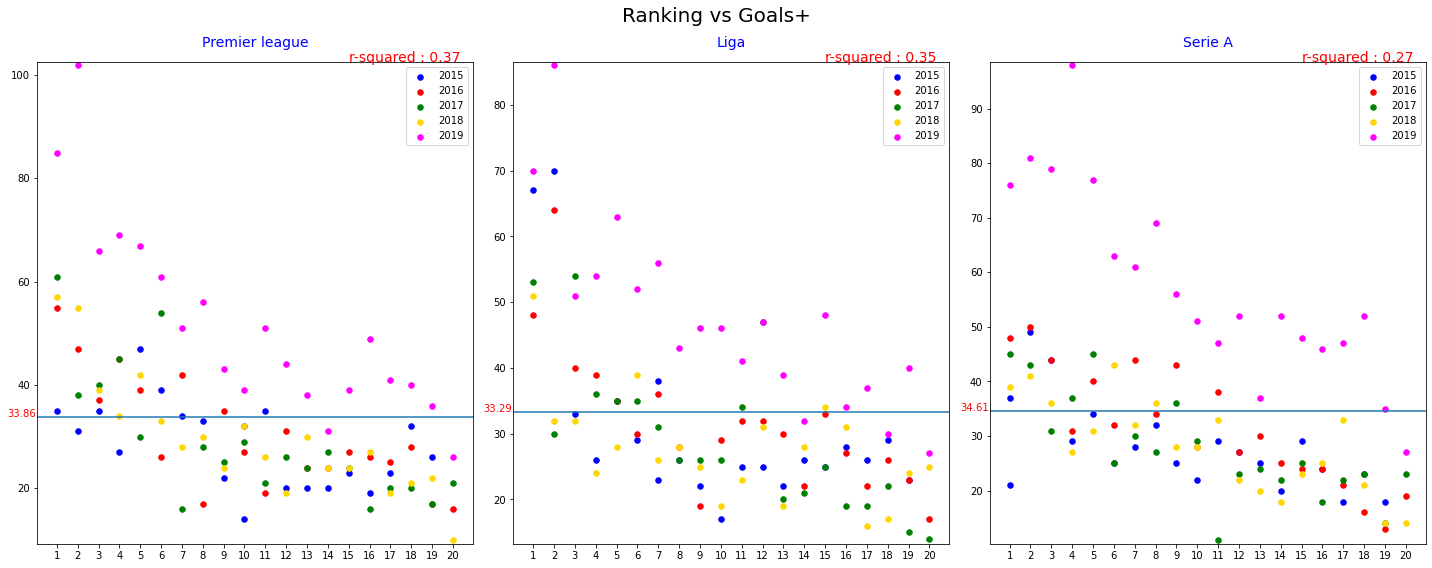

In [330]:
def plot(list_df,column1,column2):
    leagues = ["Premier league","Liga", "Serie A"]
    count=1
    plt.figure(figsize=(20,8))
    plt.suptitle(f"{column1} vs {column2}",fontsize=20)
    for i,df in enumerate(list_df):
        plt.subplot(1,3,count)
        for j,year in enumerate(sorted(list(df["Year"].unique()))):
            if df[df["Year"]==year][column2].all() == 0:
                continue
            colors = ['blue','red','green','gold','magenta']
            x = df[df["Year"]==year][column1]
            y = df[df["Year"]==year][column2]
            plt.scatter(x,y,label=year,c=colors[j],s=30)
        plt.legend(loc="best")
        plt.xticks(np.arange(round(min(df[column1])),round(max(df[column1])+1)))
        plt.ylim(min(df[column2])-0.75,max(df[column2])+0.5)
        avg = round(df[column2].mean(),2)    
        plt.title(leagues[i], fontsize=14,color="b",pad=15)
        plt.axhline(avg)
        plt.text(min(df[column1])-1,avg,f"{avg}",horizontalalignment='right',color="r")
        plt.tight_layout()
        count+=1
        r = stats.pearsonr(df[column1],df[column2])[0]
        plt.annotate(f"r-squared : {round(r**2,2)}",(max(df[column1]-5),max(df[column2])+0.5),fontsize=14, color= "r")
    path = "ouput_data/"
    filename = f"{column1.replace(' ','_')}VS{column2.replace(' ','_')}.png"
    f = open(path+filename,"w")
    f.close()
    plt.savefig(path+filename)
plot(list_dfs,"Ranking","Goals+")

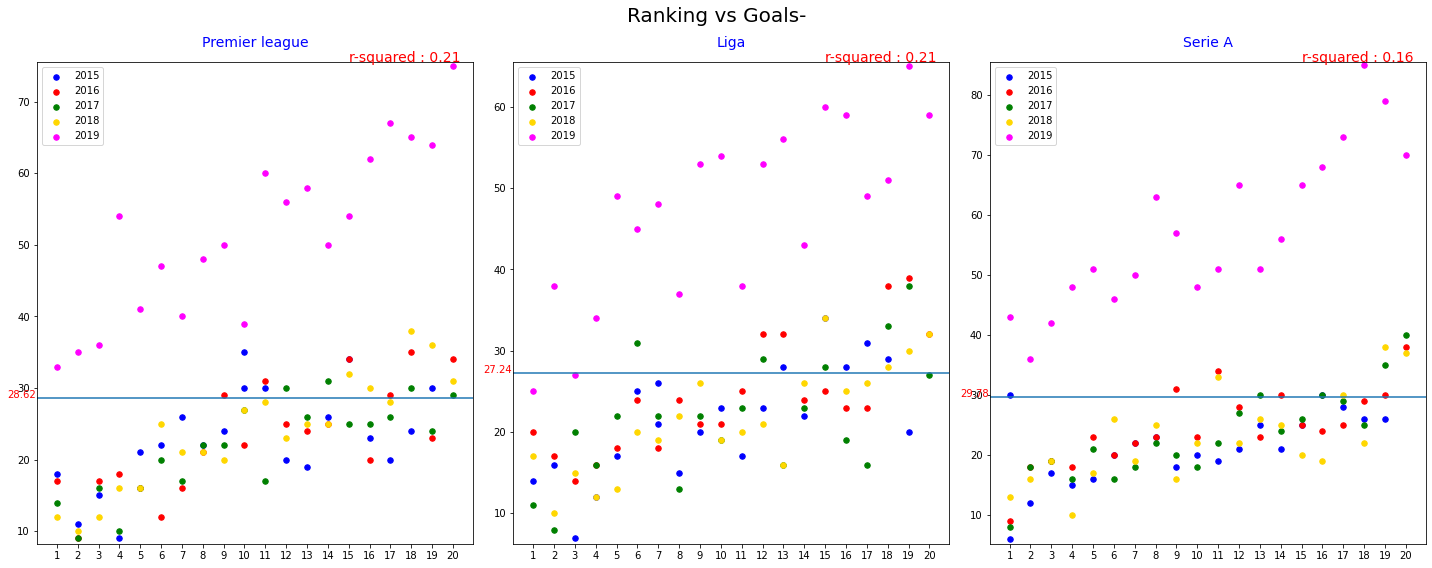

In [331]:
plot(list_dfs,"Ranking","Goals-")

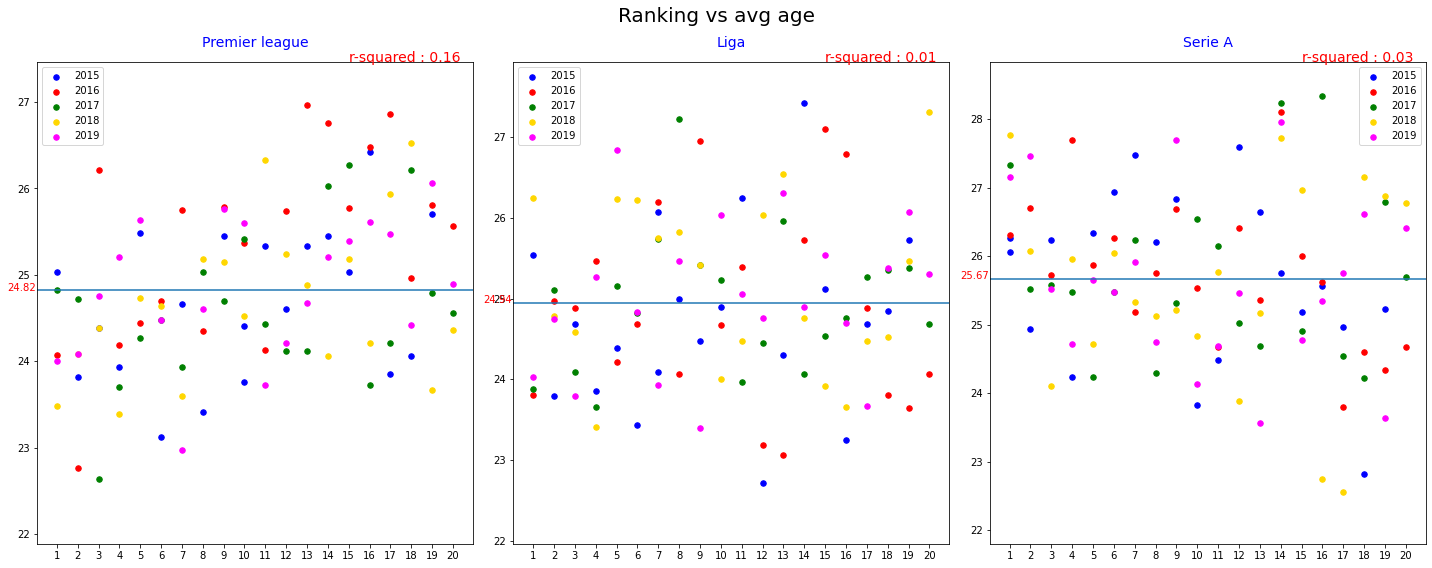

In [332]:
plot(list_dfs,"Ranking","avg age")

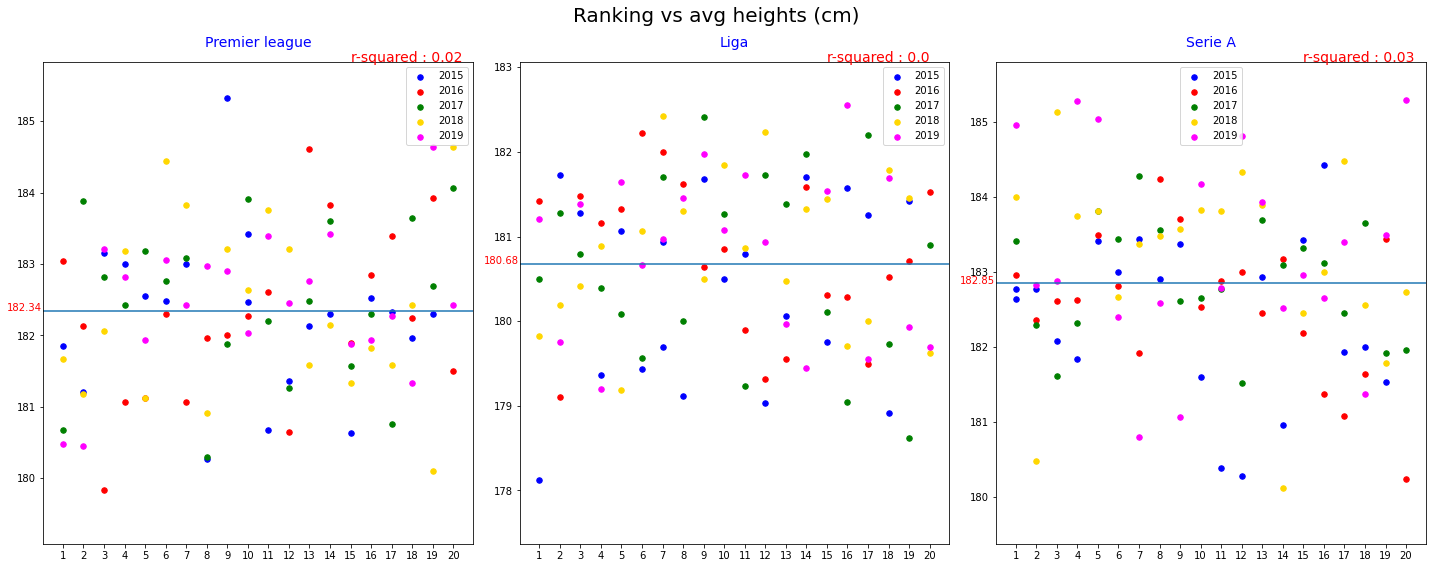

In [333]:
plot(list_dfs,"Ranking","avg heights (cm)")

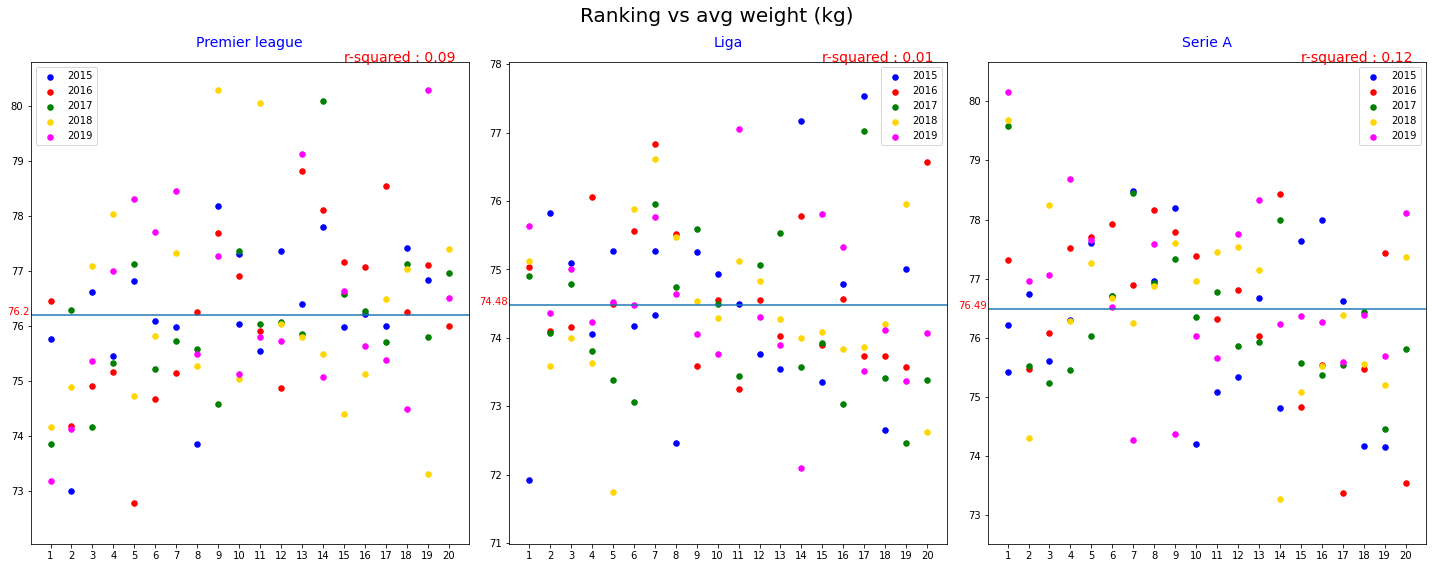

In [334]:
plot(list_dfs,"Ranking","avg weight (kg)")

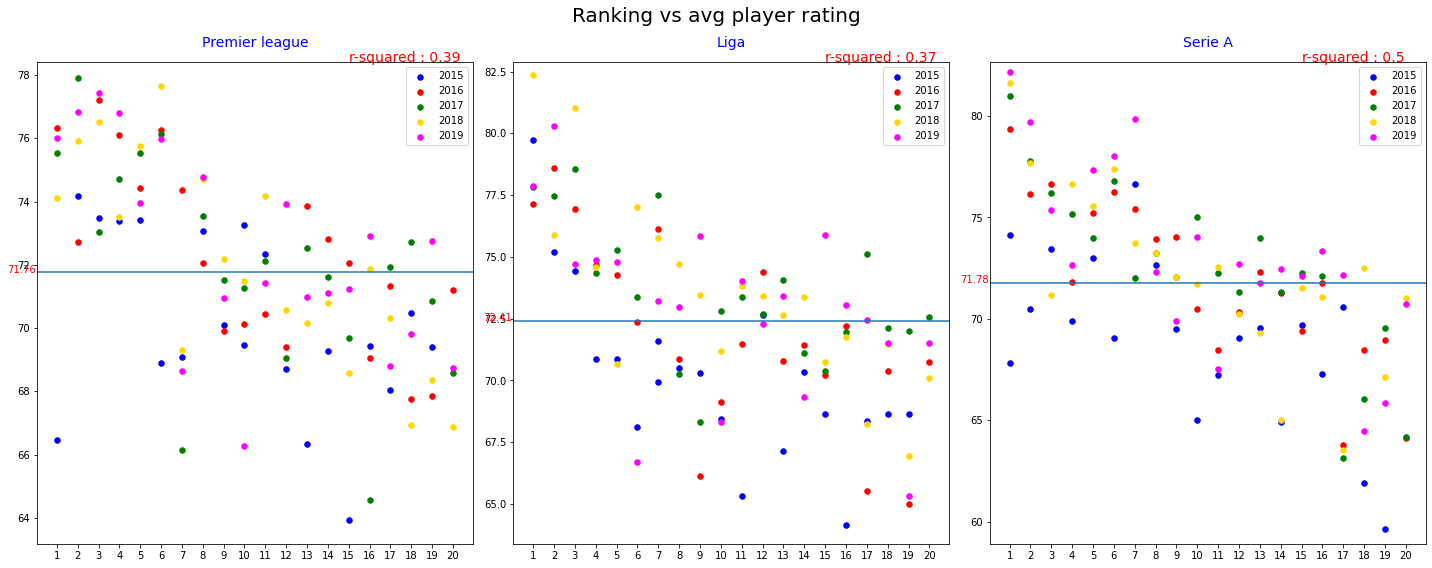

In [335]:
plot(list_dfs,"Ranking","avg player rating")

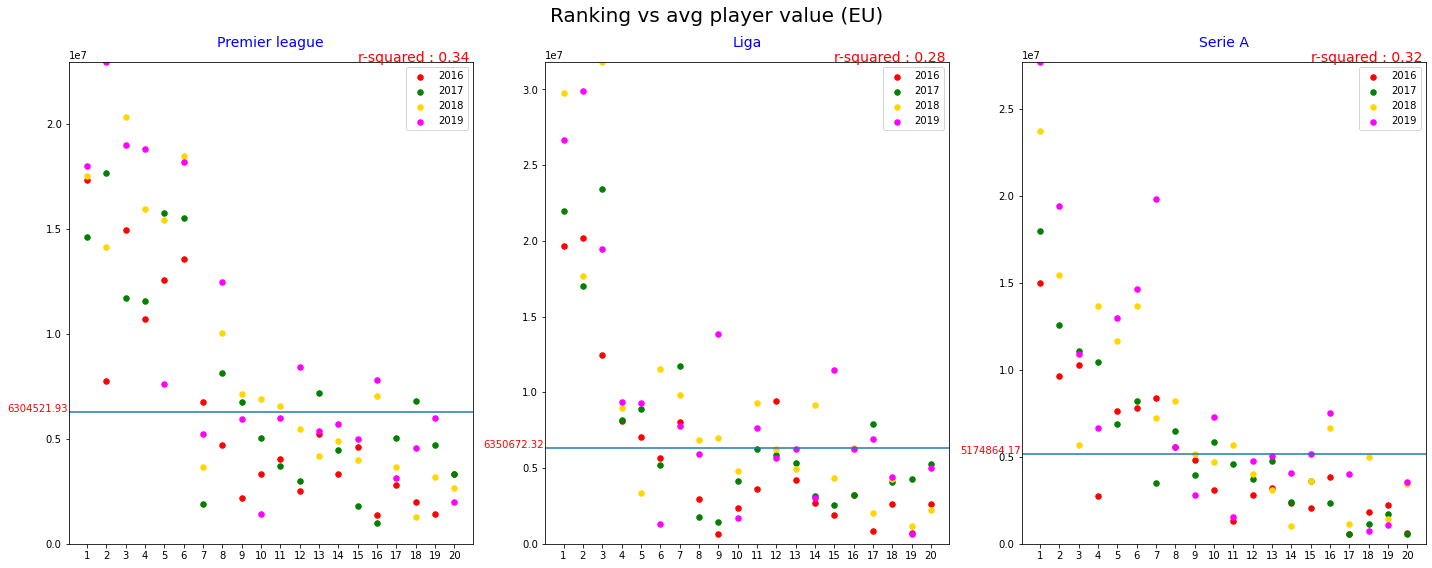

In [336]:
plot(list_dfs,"Ranking","avg player value (EU)")

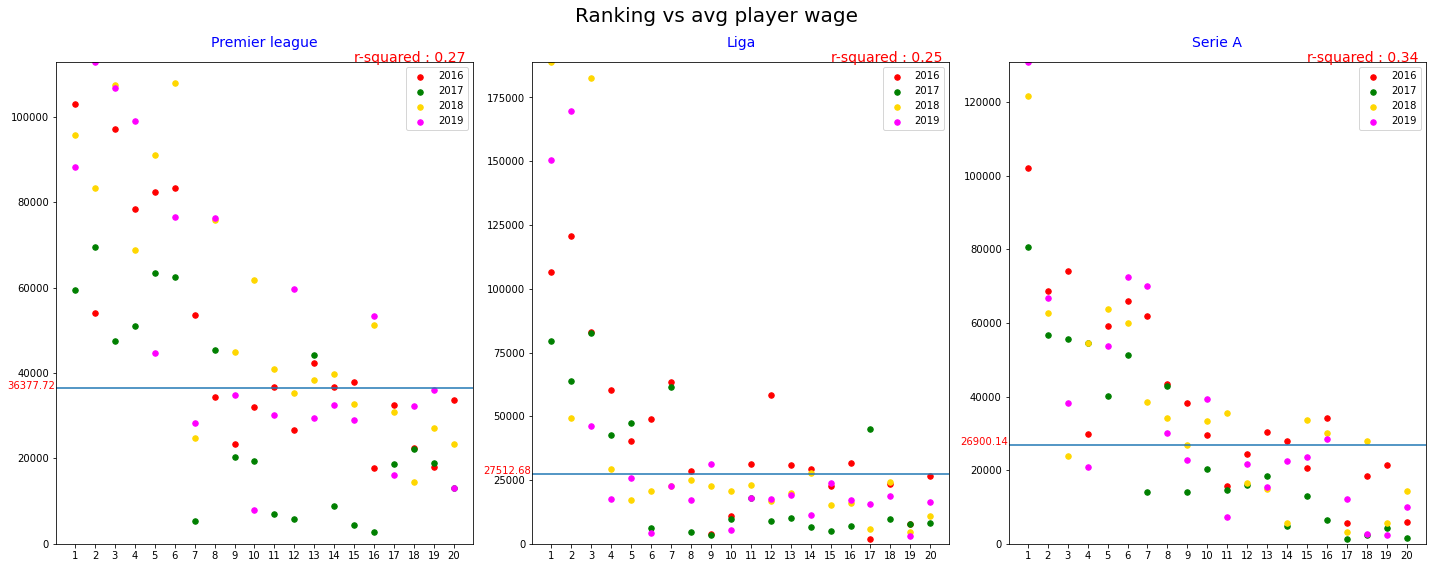

In [337]:
plot(list_dfs,"Ranking","avg player wage")

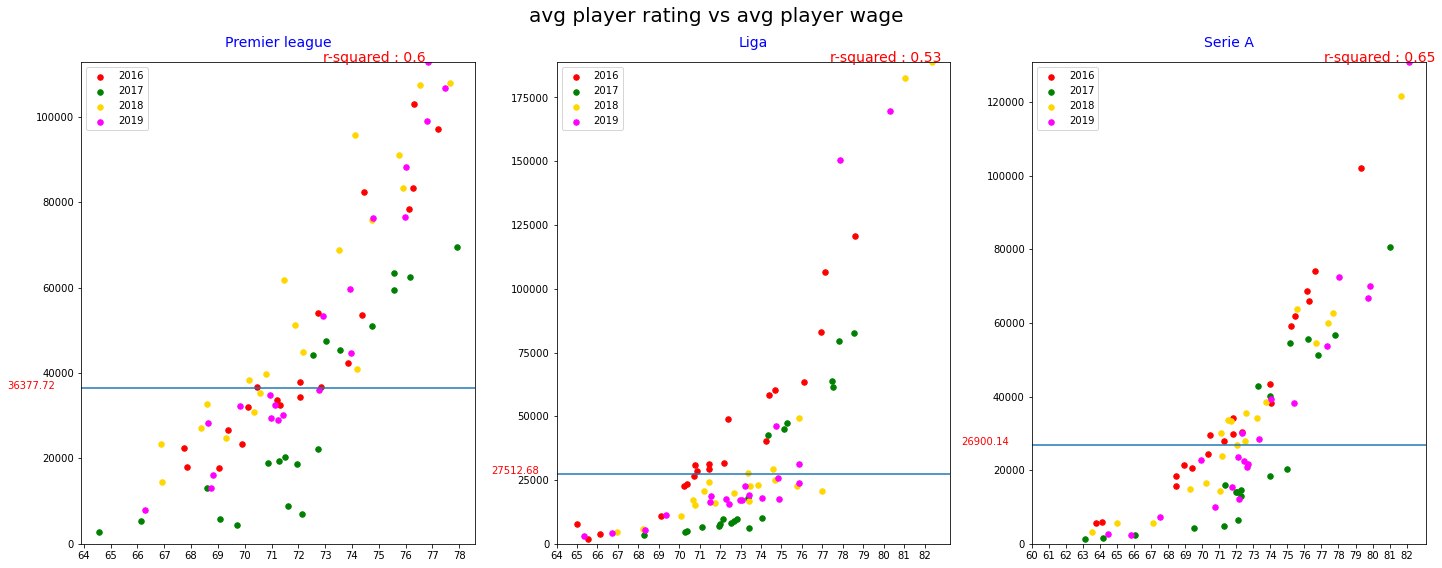

In [338]:
plot(list_dfs,"avg player rating","avg player wage")

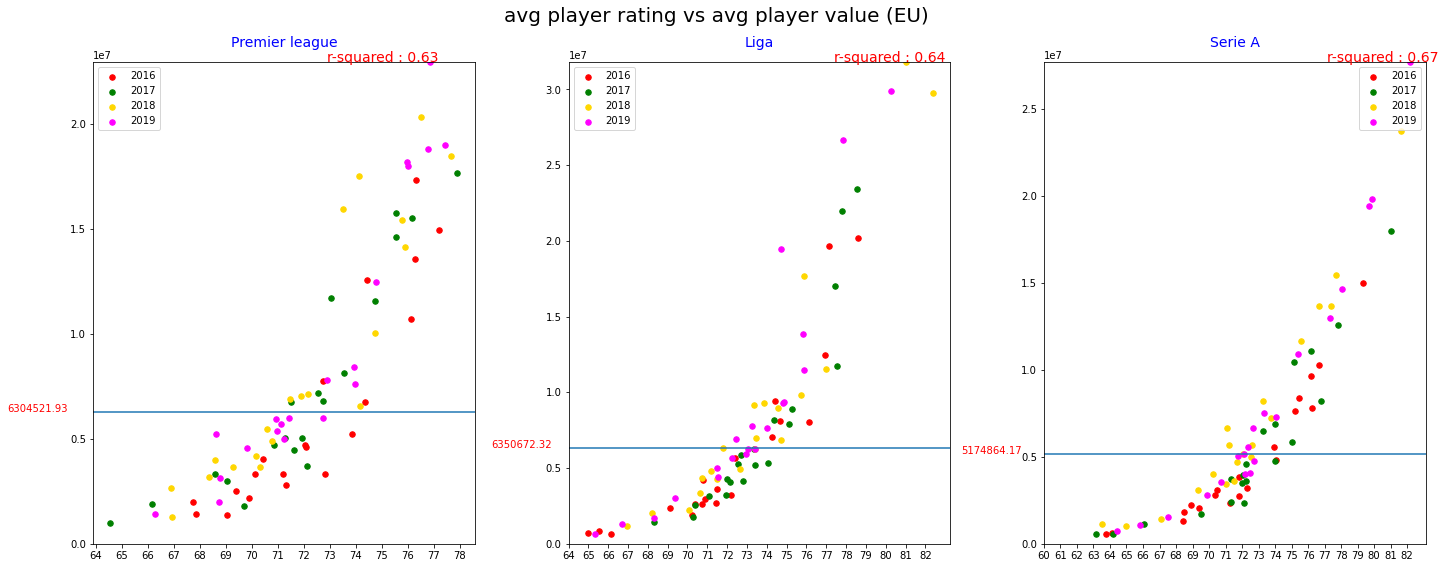

In [339]:
plot(list_dfs,"avg player rating","avg player value (EU)")

[Observations]:
* It seems obvious but the most important variable to build a winning team is the talent you have in your team.
The average player rating in the top 3 leagues in Europe is around 72 on a scale of 100. This mesure comes from the fifa rating that mesures each player skill and summarise with on overall rating.
With some expetions in 2015 and one in 2018 we observe that none of the top 4 teams have an overal rating below 75.

* Folowing this first observation we clearly see the impact of the player ranking and the player wage. So if we want to build a winning team knowing the needed average, we can prepare a wage budget. (or with or defined budget we can build or winning team). Notice that the are big differences with an average in the top 4 in Italy around 50k, 66k in Englang and 74k in Spain. The average for the 3 leagues is between 27k and 37k for England.

* The 2 other important variables are the number of scored goals and then the number of conceeded goals. There is also a clear gap between the previous seasons and the season 2019. The top 4 have an average goal between 48 and 50 where the average is around 34. And the top 4 conceeded between 18 and 21 goals where the average is between 27 and 29.
we observe that a balanced decision is needed bit that the offensive players will have an bigger impact on the season's result.




[Recommendations]:
